## import libraries and packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as mn
from matplotlib import pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor

## import data

In [2]:
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

## explore datasets

In [3]:
# training set
train.head(10)

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,target
0,1,0.670390,0.811300,0.643968,0.291791,0.284117,0.855953,0.890700,0.285542,0.558245,0.779418,0.921832,0.866772,0.878733,0.305411,7.243043
1,3,0.388053,0.621104,0.686102,0.501149,0.643790,0.449805,0.510824,0.580748,0.418335,0.432632,0.439872,0.434971,0.369957,0.369484,8.203331
2,4,0.834950,0.227436,0.301584,0.293408,0.606839,0.829175,0.506143,0.558771,0.587603,0.823312,0.567007,0.677708,0.882938,0.303047,7.776091
3,5,0.820708,0.160155,0.546887,0.726104,0.282444,0.785108,0.752758,0.823267,0.574466,0.580843,0.769594,0.818143,0.914281,0.279528,6.957716
4,8,0.935278,0.421235,0.303801,0.880214,0.665610,0.830131,0.487113,0.604157,0.874658,0.863427,0.983575,0.900464,0.935918,0.435772,7.951046
5,9,0.352623,0.258867,0.327373,0.802627,0.284219,0.296886,0.209743,0.273710,0.308018,0.235851,0.278760,0.251406,0.339135,0.293129,7.346874
6,11,0.259096,0.803934,0.580900,0.322884,0.984705,0.378247,0.432821,0.562059,0.290965,0.316543,0.219192,0.326977,0.458653,0.244300,8.616237
7,12,0.481610,0.805446,0.235836,0.365011,0.734725,0.404825,0.465061,0.578794,0.418807,0.451958,0.458720,0.586586,0.321026,0.834694,6.833895
8,13,0.667920,0.776422,0.255154,0.869598,0.678067,0.475274,0.493290,0.638779,0.491023,0.617451,0.413352,0.485558,0.474055,0.608374,8.540793
9,15,0.937751,0.236482,0.216445,0.476463,0.283642,0.456763,0.316416,0.785602,0.695845,0.370941,0.436835,0.826278,0.856748,0.418593,7.701053


In [4]:
train.tail(5)

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,target
299995,499995,0.216974,0.735265,0.648648,0.255387,0.616353,0.345197,0.295718,0.304357,0.314351,0.860504,0.315397,0.247682,0.486542,0.288750,7.385215
299996,499996,0.545799,0.165139,0.220966,0.190053,0.359362,0.386336,0.365767,0.344217,0.466446,0.454581,0.360251,0.360755,0.292535,0.619984,7.242617
299997,499997,0.284401,0.841542,0.957585,0.340383,0.396279,0.330376,0.525687,0.260039,0.378174,0.526925,0.491735,0.516629,0.173521,0.714552,9.592487
299998,499998,0.481900,0.622346,0.540032,0.823118,0.283066,0.434283,0.174342,0.710843,0.358690,0.648272,0.984647,1.001110,0.063956,0.377693,8.207951
299999,499999,0.486632,0.230090,0.543587,0.263878,0.279118,0.636295,0.472391,0.339654,0.444787,0.636765,0.782196,0.559692,0.762954,0.215539,8.890285


In [5]:
# test set
test.head(10)

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
0,0,0.353600,0.738780,0.600939,0.293377,0.285691,0.458006,0.620704,0.422249,0.369203,0.435727,0.550540,0.699134,0.286864,0.364515
1,2,0.907222,0.189756,0.215531,0.869915,0.301333,0.528958,0.390351,0.521112,0.794779,0.798580,0.446475,0.449037,0.916964,0.513002
2,6,0.179287,0.355353,0.623972,0.437812,0.282476,0.320826,0.386789,0.776422,0.222268,0.229102,0.211913,0.222651,0.327164,0.827941
3,7,0.359385,0.181049,0.551368,0.206386,0.280763,0.482076,0.506677,0.362793,0.379737,0.345686,0.445276,0.518485,0.299028,0.598166
4,10,0.335791,0.682607,0.676481,0.219465,0.282861,0.581721,0.748639,0.350158,0.448915,0.506878,0.817721,0.805895,0.790591,0.249275
5,14,0.256414,0.621835,0.959441,0.913052,0.387511,0.314620,0.322014,0.614673,0.292548,0.899578,0.278104,0.274086,0.418178,0.715106
6,16,0.485888,0.359113,0.613006,0.257908,0.283429,0.646103,0.963301,0.311508,0.581260,0.638479,0.840254,0.854393,0.893814,0.269365
7,17,0.673931,0.734818,0.361756,0.567235,0.284732,0.453174,0.515395,0.789382,0.714804,0.265037,0.323776,0.507847,0.539327,0.849788
8,18,0.926054,0.619843,0.356893,0.868551,0.284436,0.865728,0.456673,0.729383,0.739350,0.867766,0.906833,0.963105,0.901933,0.826835
9,19,0.497196,0.619562,0.623283,0.323464,0.503100,0.457458,0.447466,0.612733,0.409860,0.438677,0.330754,0.348405,0.355242,0.259408


In [6]:
test.tail(5)

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
199995,499984,0.353856,0.677578,0.550852,0.869612,0.957635,0.255054,0.289138,0.635979,0.271399,0.282455,0.217169,0.219088,0.373261,0.272479
199996,499985,0.243209,0.135627,0.218393,0.792798,0.547639,0.433520,0.549540,0.650107,0.453787,0.459689,0.450424,0.511176,0.318334,0.395747
199997,499987,0.506973,0.683893,0.533434,0.192957,0.314381,0.358604,0.554455,0.267105,0.396101,0.445390,0.382656,0.397978,0.381235,0.369464
199998,499988,0.347870,0.553112,0.495284,0.861500,0.816914,0.298478,0.275964,0.265841,0.334250,0.252635,0.213589,0.285223,0.336772,0.388505
199999,499990,0.688188,0.358328,0.644511,0.766354,0.747591,0.727329,0.468329,0.576711,0.453124,0.381600,0.299126,0.499627,0.691078,0.668109


## missing values
checking data sets for any missing values

In [7]:
# train set
train.isna().sum()

id        0
cont1     0
cont2     0
cont3     0
cont4     0
cont5     0
cont6     0
cont7     0
cont8     0
cont9     0
cont10    0
cont11    0
cont12    0
cont13    0
cont14    0
target    0
dtype: int64

In [8]:
# test set
test.isna().sum()

id        0
cont1     0
cont2     0
cont3     0
cont4     0
cont5     0
cont6     0
cont7     0
cont8     0
cont9     0
cont10    0
cont11    0
cont12    0
cont13    0
cont14    0
dtype: int64

## visualize nullity of random sample of data

<Figure size 1800x1800 with 0 Axes>

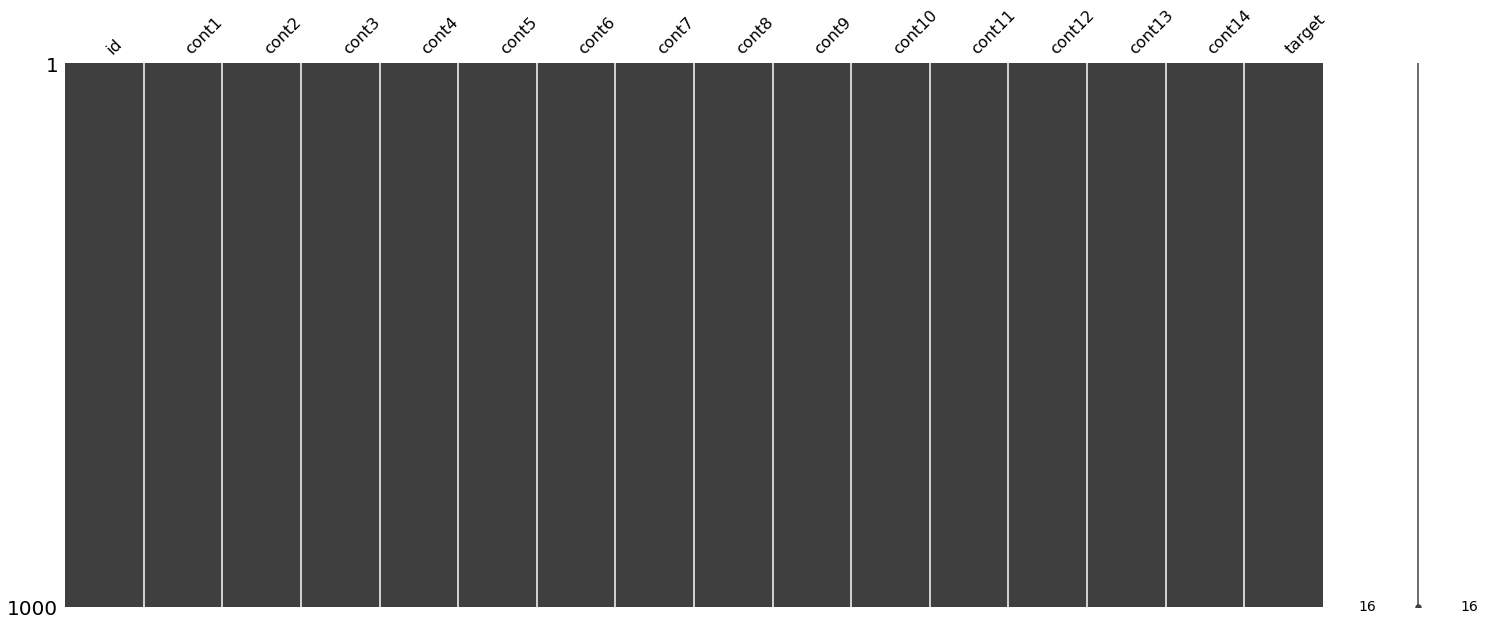

In [9]:
plt.figure(figsize=[6,6],dpi=300)
mn.matrix(train.sample(1000))
plt.show()

<Figure size 1800x1800 with 0 Axes>

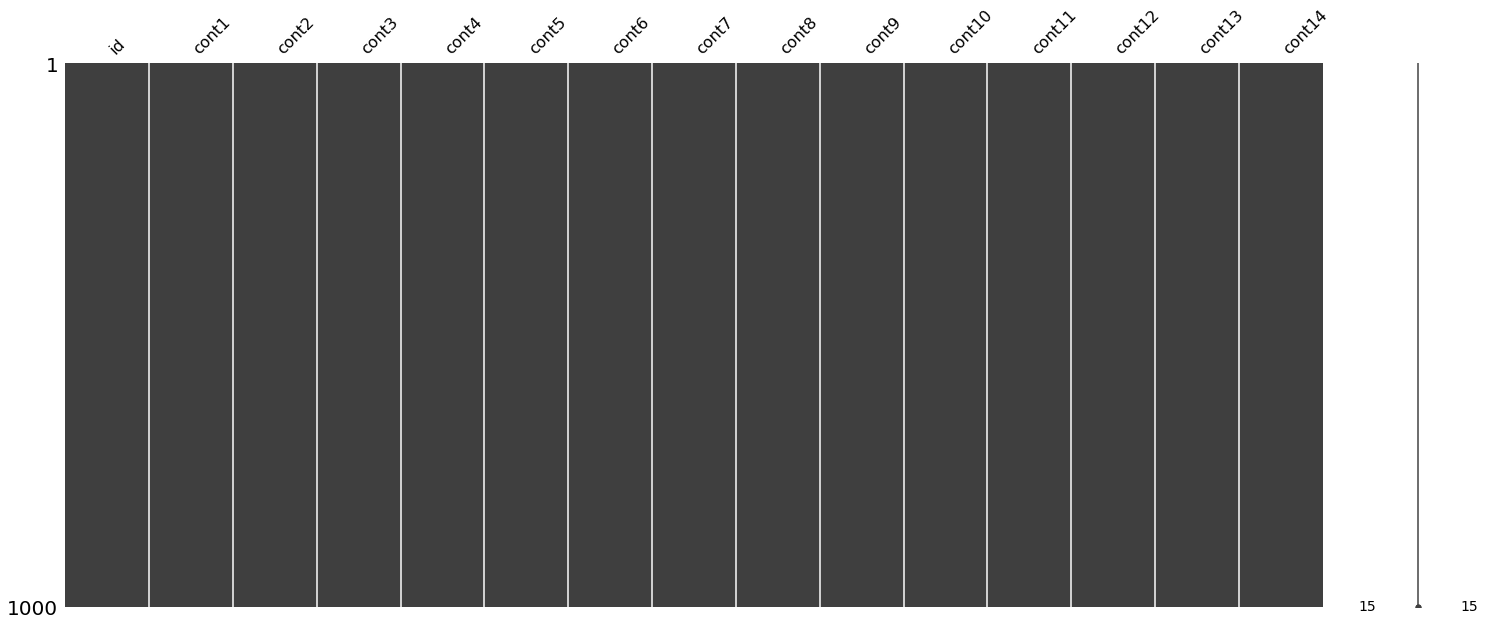

In [10]:
plt.figure(figsize=[6,6],dpi=300)
mn.matrix(test.sample(1000))
plt.show()

## feature analysis

In [22]:
# data types of features
numerical_features = train.select_dtypes(include=np.number)
categorical_features = train.select_dtypes(include=np.object)

print(f'numeric features:{numerical_features.columns}, categorical features: {categorical_features.columns}')

numeric features:Index(['cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7', 'cont8',
       'cont9', 'cont10', 'cont11', 'cont12', 'cont13', 'cont14'],
      dtype='object'), categorical features: Index([], dtype='object')


In [12]:
# information about features
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 16 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      300000 non-null  int64  
 1   cont1   300000 non-null  float64
 2   cont2   300000 non-null  float64
 3   cont3   300000 non-null  float64
 4   cont4   300000 non-null  float64
 5   cont5   300000 non-null  float64
 6   cont6   300000 non-null  float64
 7   cont7   300000 non-null  float64
 8   cont8   300000 non-null  float64
 9   cont9   300000 non-null  float64
 10  cont10  300000 non-null  float64
 11  cont11  300000 non-null  float64
 12  cont12  300000 non-null  float64
 13  cont13  300000 non-null  float64
 14  cont14  300000 non-null  float64
 15  target  300000 non-null  float64
dtypes: float64(15), int64(1)
memory usage: 36.6 MB


In [13]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      200000 non-null  int64  
 1   cont1   200000 non-null  float64
 2   cont2   200000 non-null  float64
 3   cont3   200000 non-null  float64
 4   cont4   200000 non-null  float64
 5   cont5   200000 non-null  float64
 6   cont6   200000 non-null  float64
 7   cont7   200000 non-null  float64
 8   cont8   200000 non-null  float64
 9   cont9   200000 non-null  float64
 10  cont10  200000 non-null  float64
 11  cont11  200000 non-null  float64
 12  cont12  200000 non-null  float64
 13  cont13  200000 non-null  float64
 14  cont14  200000 non-null  float64
dtypes: float64(14), int64(1)
memory usage: 22.9 MB


In [14]:
# id feature is not important, so drop it
train.drop('id',axis=1,inplace=True)
test.drop('id',axis=1,inplace=True)

In [15]:
# separate target feature from train data
target = train['target']
train.drop('target',axis=1,inplace=True)

## uni-variant analysis on each feature to get know about distribution

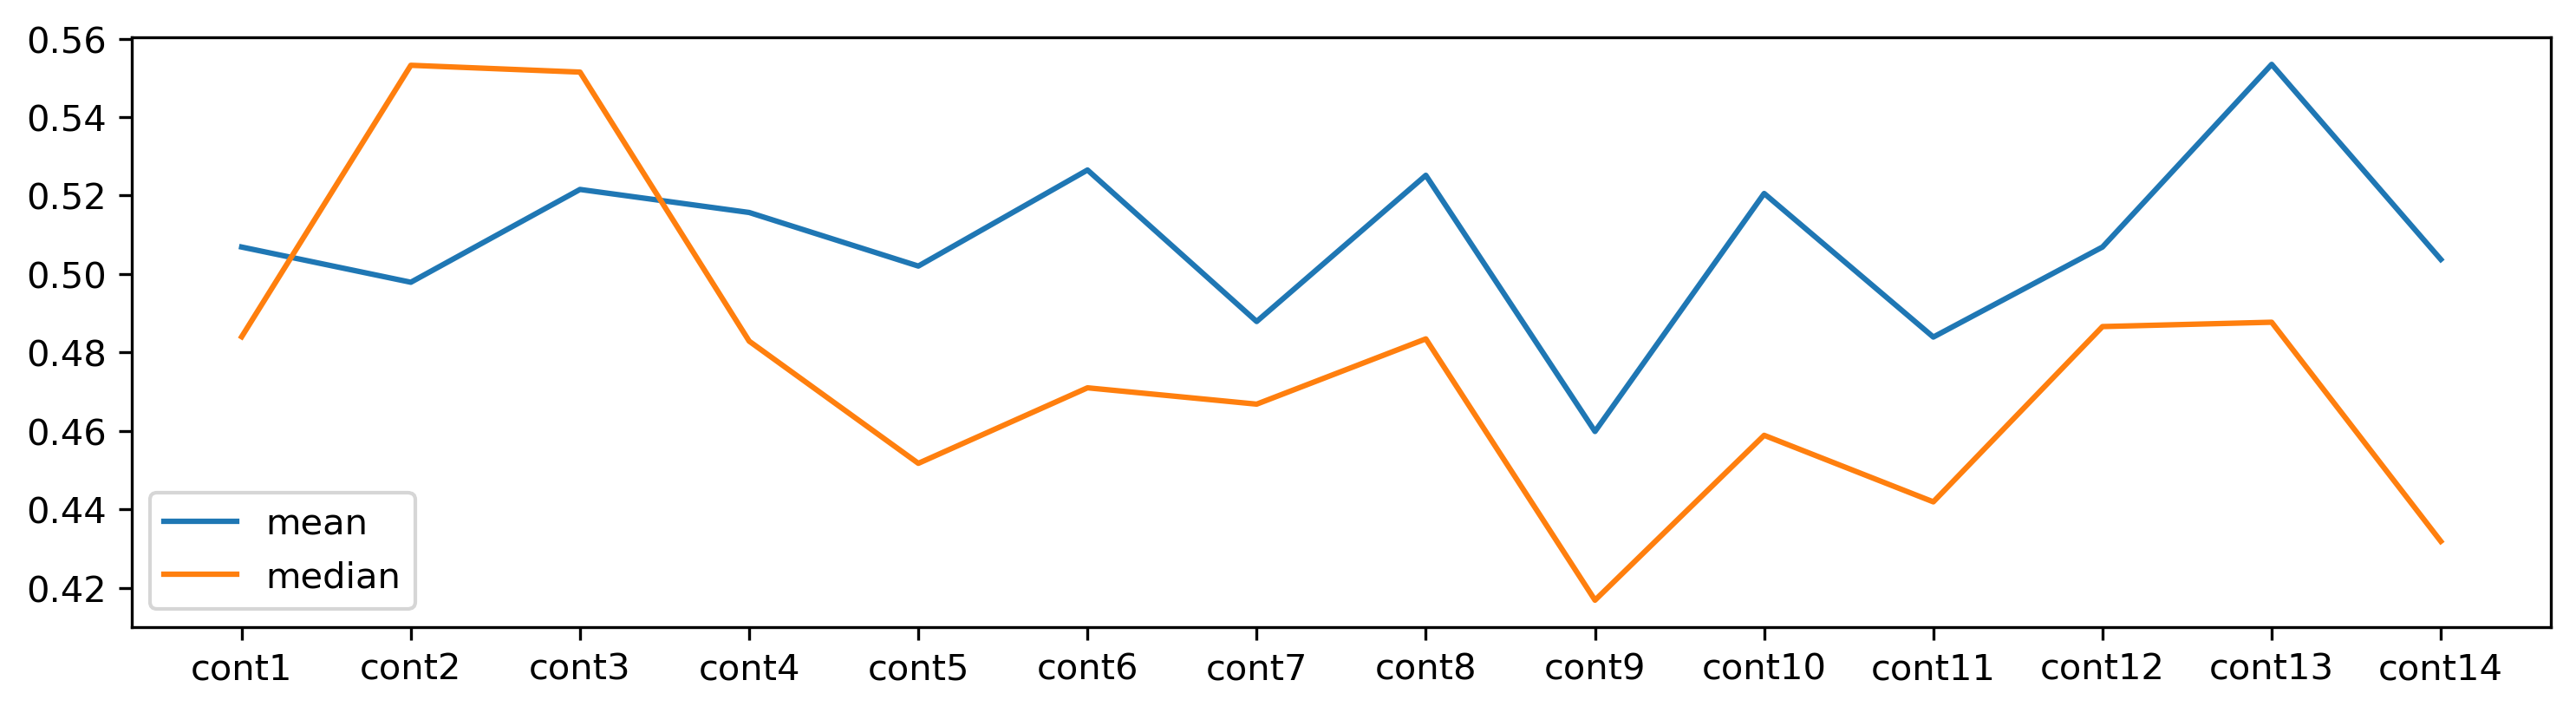

In [16]:
# central tendency of each feature
train_cols = train.columns
train_mean = np.mean(train,axis=0)
train_median = np.median(train,axis=0)

plt.figure(figsize=[12,3],dpi=300)
sns.lineplot(x=train_cols,y=train_mean,label='mean')
sns.lineplot(x=train_cols,y=train_median,label='median')
plt.legend()
plt.show()

In [17]:
np.std(train,axis=0)

cont1     0.203976
cont2     0.228159
cont3     0.200770
cont4     0.233035
cont5     0.220701
cont6     0.217909
cont7     0.181096
cont8     0.216221
cont9     0.196684
cont10    0.201854
cont11    0.220082
cont12    0.218947
cont13    0.229730
cont14    0.208237
dtype: float64

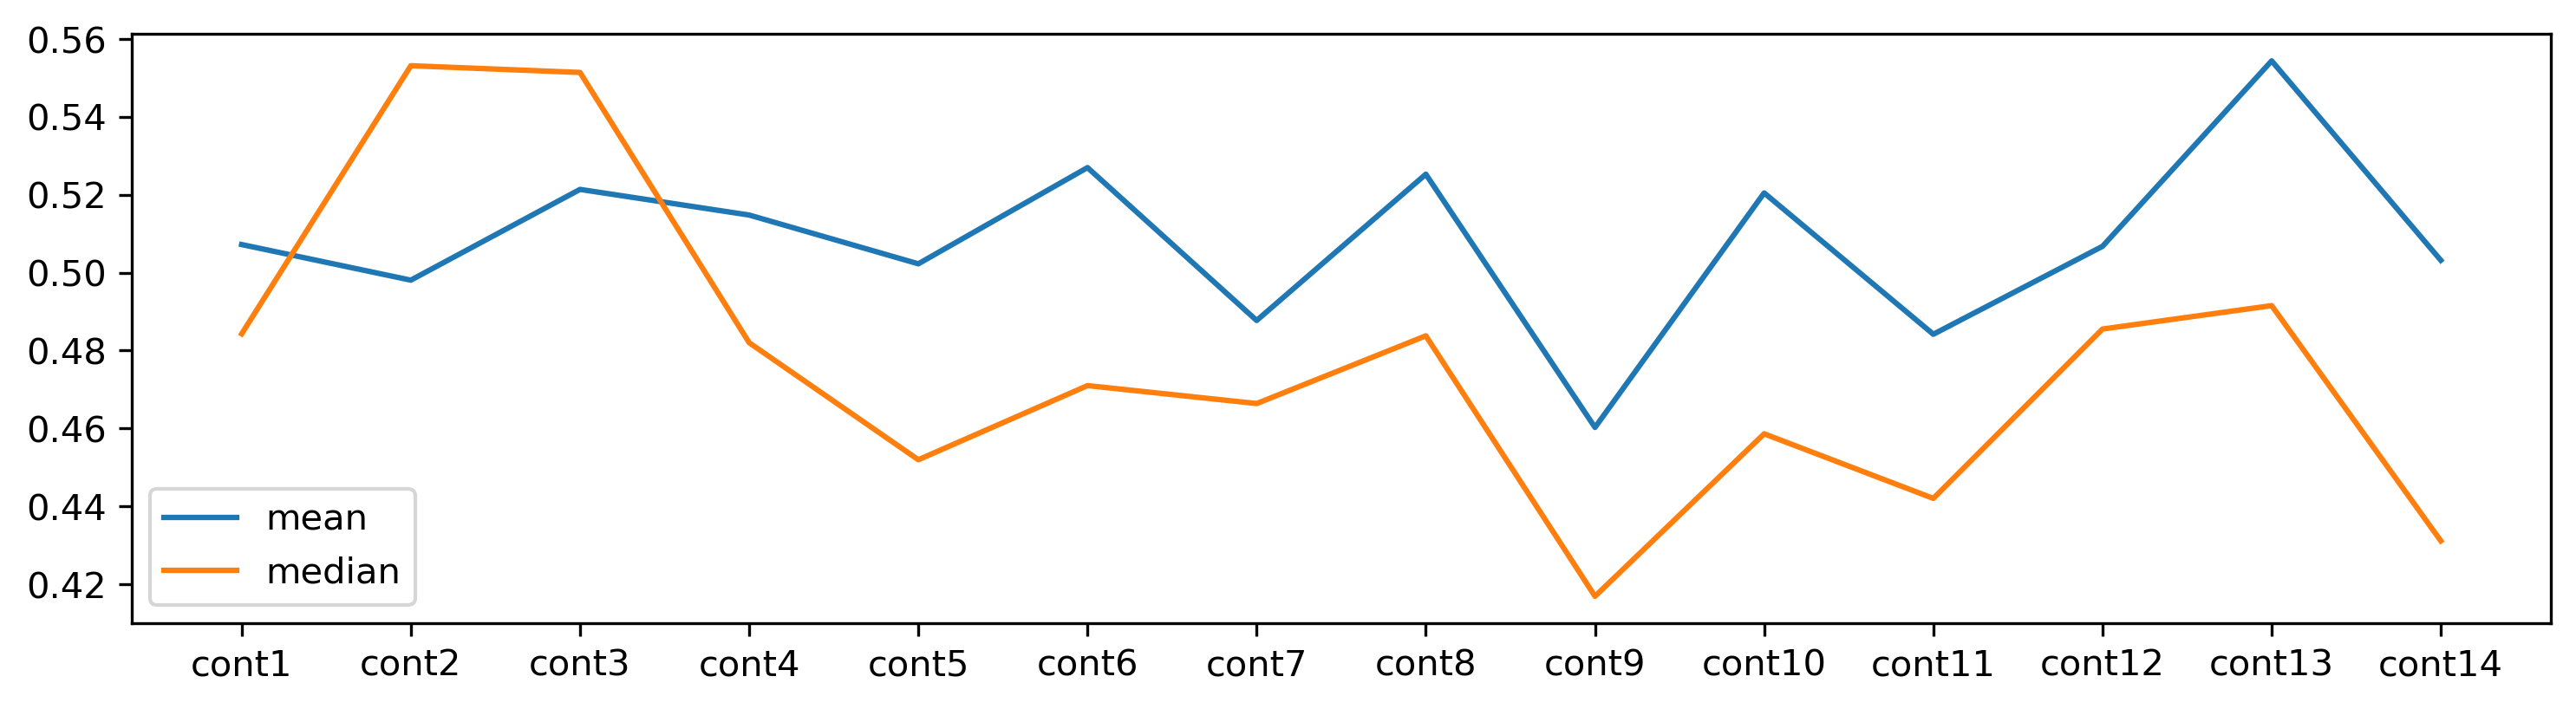

In [18]:
test_cols = test.columns
test_mean = np.mean(test,axis=0)
test_median = np.median(test,axis=0)

plt.figure(figsize=[12,3],dpi=300)
sns.lineplot(x=test_cols,y=test_mean,label='mean')
sns.lineplot(x=test_cols,y=test_median,label='median')
plt.legend()
plt.show()

In [19]:
np.std(test,axis=0)

cont1     0.204220
cont2     0.227865
cont3     0.200655
cont4     0.232995
cont5     0.220812
cont6     0.218145
cont7     0.180804
cont8     0.216083
cont9     0.197217
cont10    0.201645
cont11    0.219971
cont12    0.218597
cont13    0.229729
cont14    0.208333
dtype: float64

In [20]:
# target feature
np.mean(target),np.median(target),np.std(target)

(7.905661328316825, 7.940570670373571, 0.7330696085805829)

In [ ]:
# mean and median are different so there perhaps outliers

## distribution of features (uni-variant analysis)

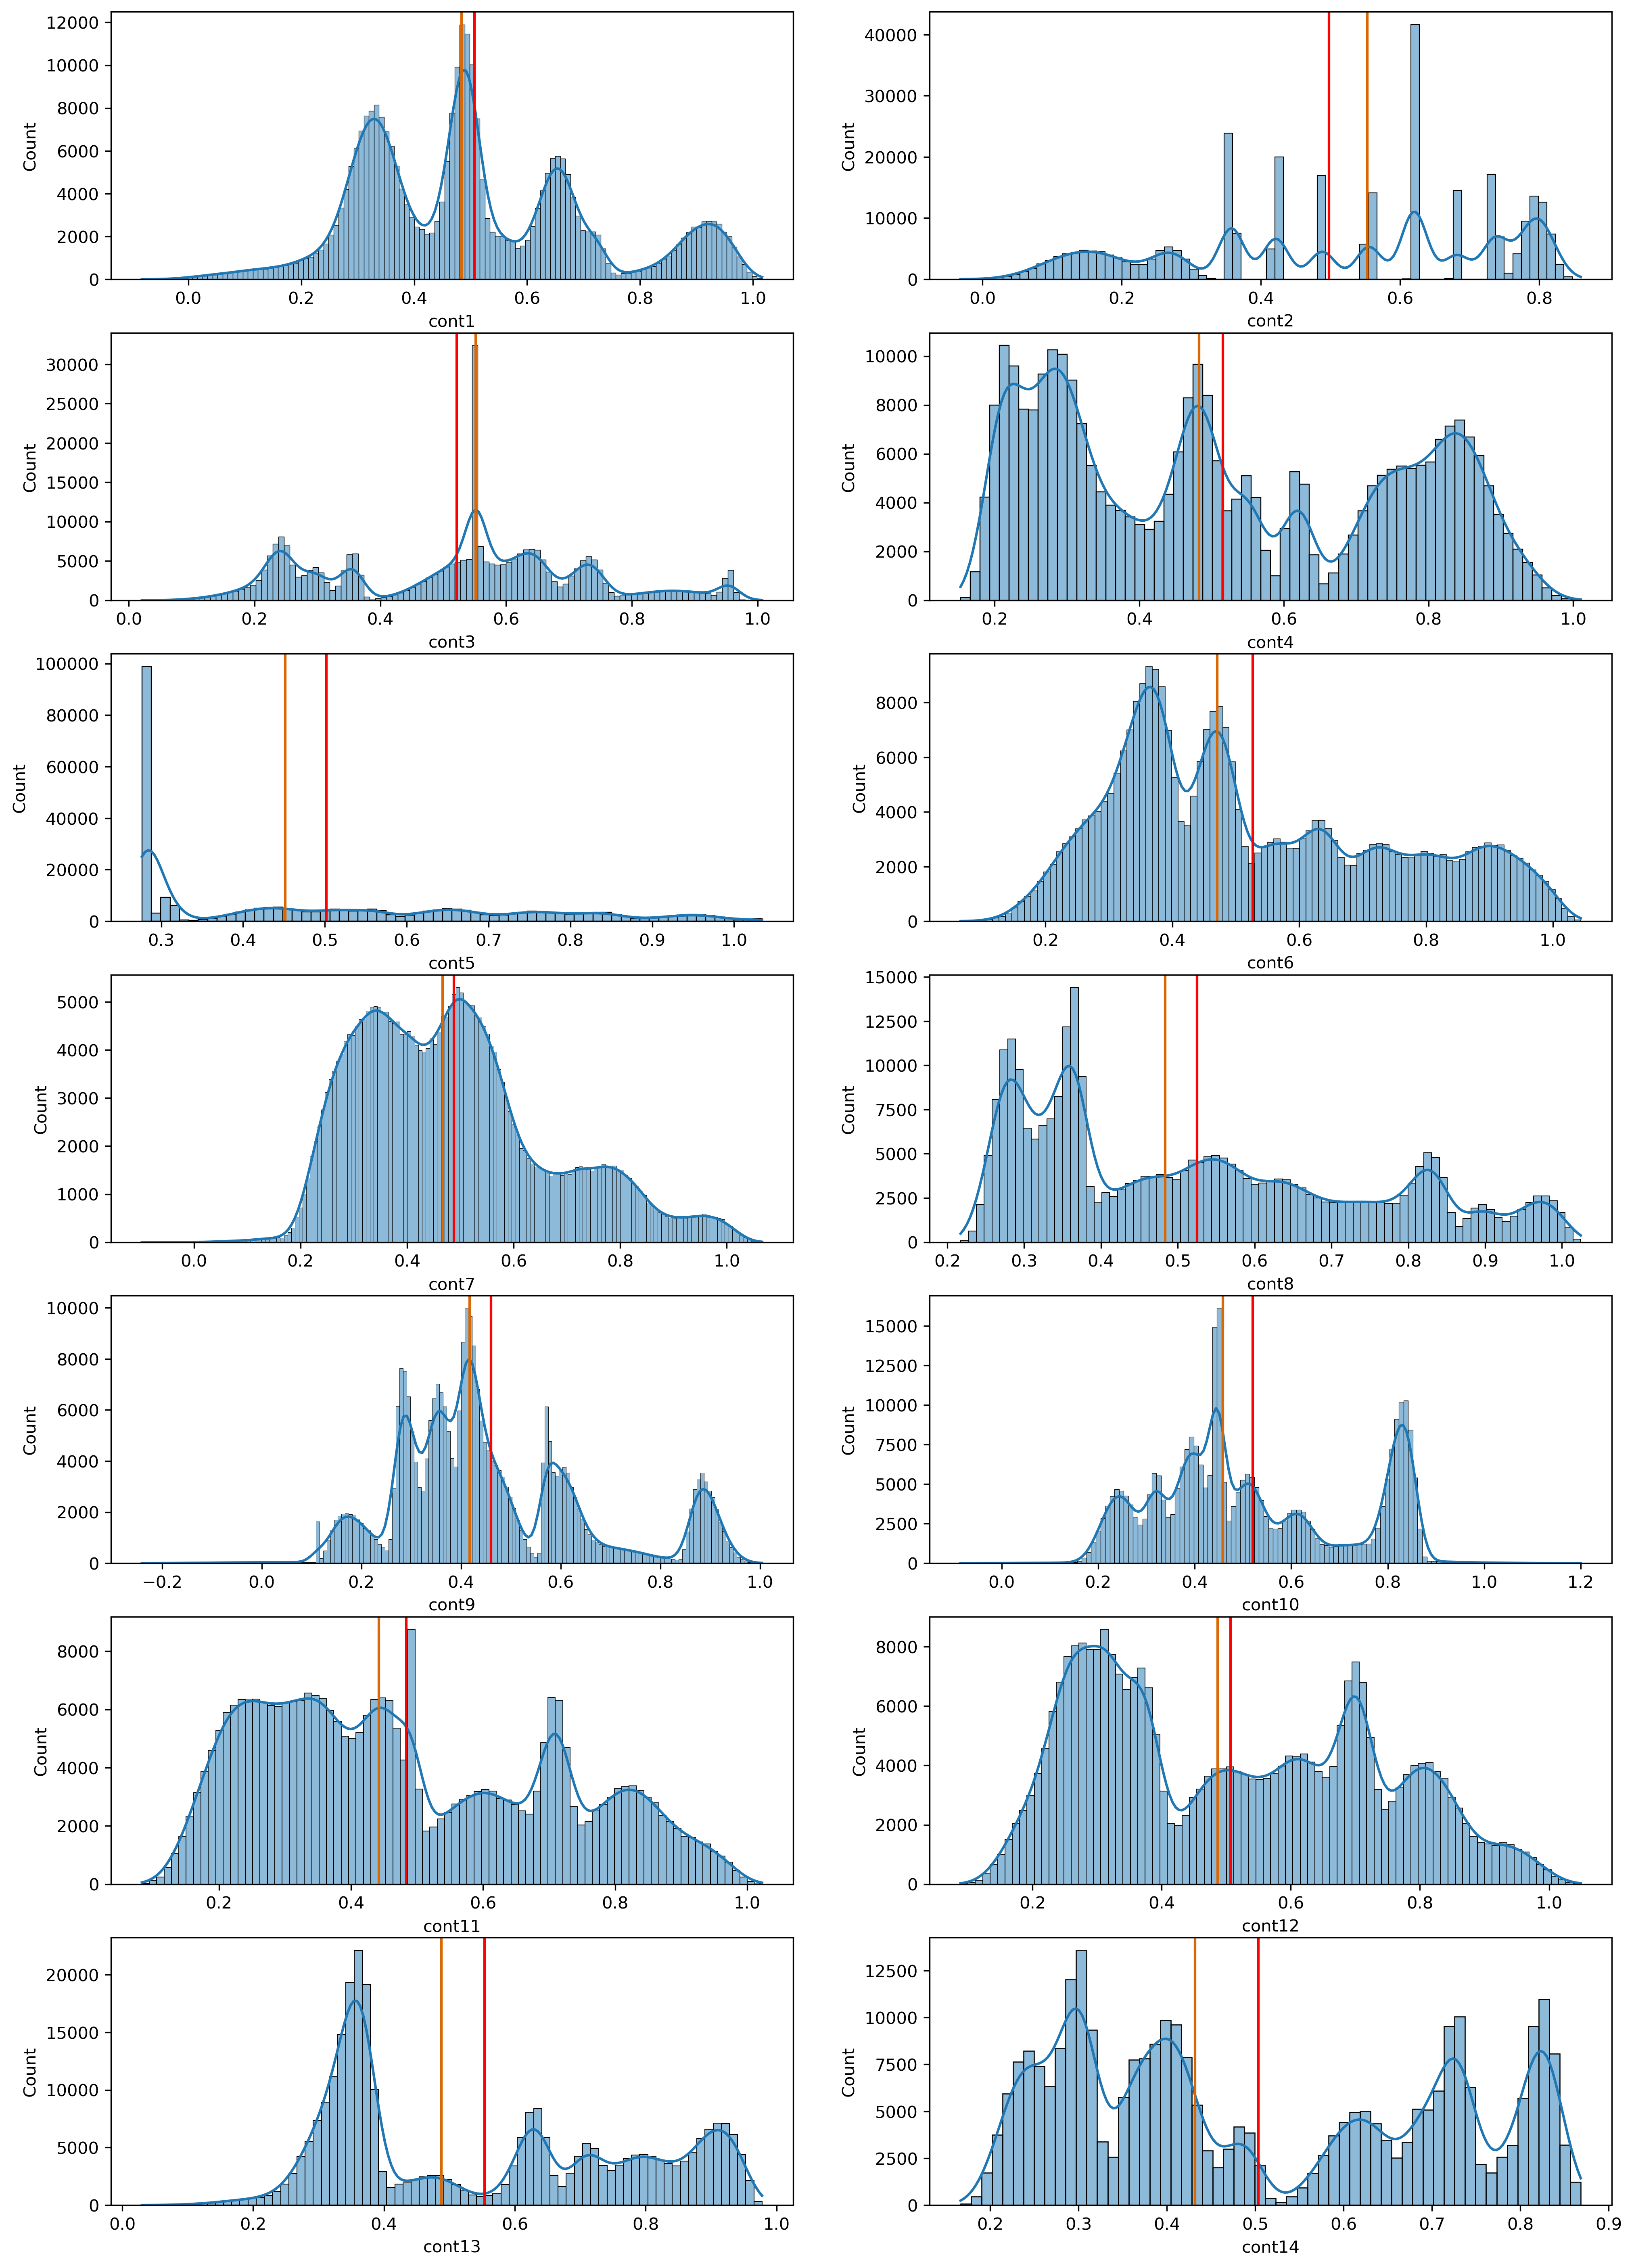

In [36]:
# normal distribution (train set)
cols = numerical_features.columns.values
fig_1,axes_1 = plt.subplots(nrows=7,ncols=2,figsize=[16,24],dpi=300)
axs = axes_1.ravel()

for i in range(len(cols)):
    sns.histplot(data=train[cols[i]],bins='auto',kde=True,ax=axs[i])
    axs[i].axvline(np.mean(train[cols[i]]),color='r')
    axs[i].axvline(np.median(train[cols[i]]),color='#D96704')

plt.savefig('./train_norm_dis.jpg')
plt.show()

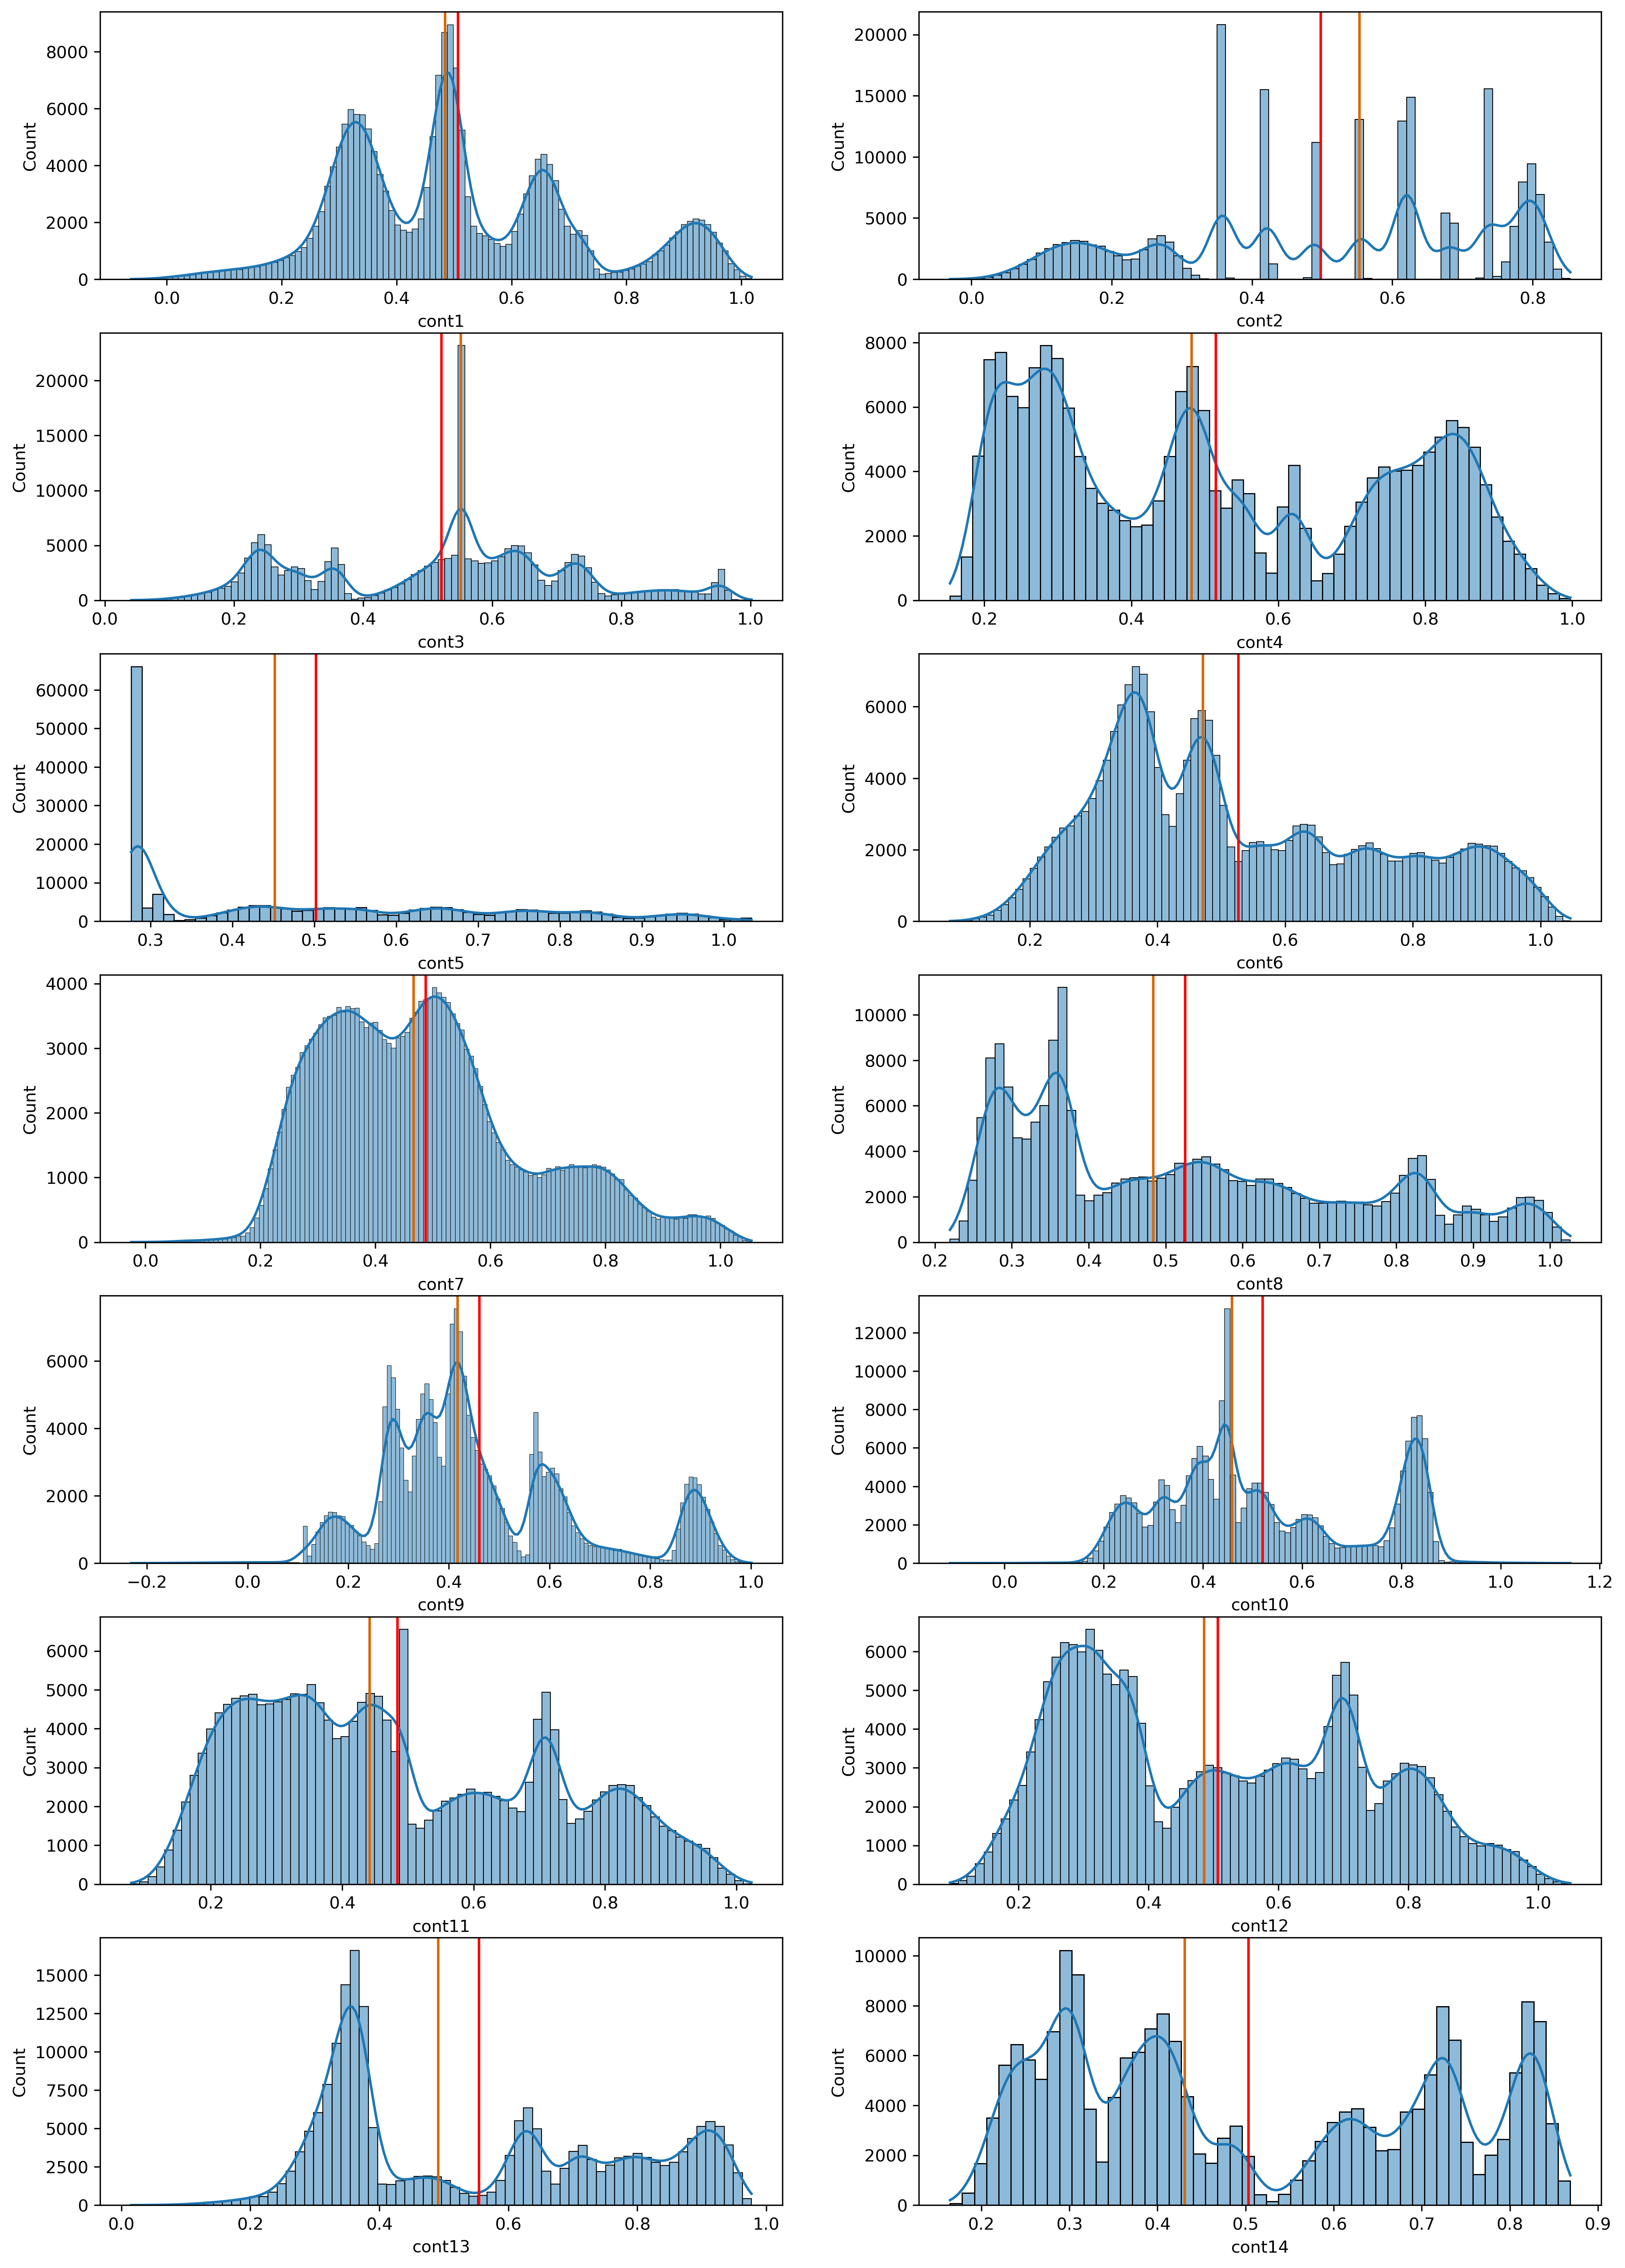

In [37]:
# normal distribution (test set)
cols = numerical_features.columns.values
fig_1,axes_1 = plt.subplots(nrows=7,ncols=2,figsize=[16,24],dpi=300)
axs = axes_1.ravel()

for i in range(len(cols)):
    sns.histplot(data=test[cols[i]],bins='auto',kde=True,ax=axs[i])
    axs[i].axvline(np.mean(test[cols[i]]),color='r')
    axs[i].axvline(np.median(test[cols[i]]),color='#D96704')

plt.savefig('./test_norm_dis.jpg')
plt.show()